# Distance Measures for Machine Learning
The first step is to calculate the distance between the new point and each training point. There are various methods for calculating this distance, of which the most commonly known methods are *__Euclidian__*, *__Manhattan__* (for continuous) and *__Hamming distance__* (for categorical).

*__Euclidean Distance__*: Euclidean distance is calculated as the square root of the sum of the squared differences between a new point (x) and an existing point (y).
$$\sqrt{\sum_{i=1}^k {(x_i-y_i)^2}}$$

*__Manhattan Distance__*: This is the distance between real vectors using the sum of their absolute difference.
$$\sum_{i=1}^k |x_i-y_i|$$

*__Hamming Distance__*: It is used for categorical variables. If the value (x) and the value (y) are the same, the distance D will be equal to 0 . Otherwise D=1.

*__Minkowski Distance__*: $$\left(\sum_{i=1}^k |x_i-y_i|^p\right)^\frac{1}{p}$$

Some common values of ‘p’ are:-

p = 1, Manhattan Distance

p = 2, Euclidean Distance

p = infinity, Chebychev Distance

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

## Data

In [17]:
dataset=pd.read_csv("bmd.csv")
dataset.head

<bound method NDFrame.head of         id        age sex     fracture  weight_kg  height_cm      medication  \
0      469  57.052768   F  no fracture       64.0      155.5  Anticonvulsant   
1     8724  75.741225   F  no fracture       78.0      162.0   No medication   
2     6736  70.778900   M  no fracture       73.0      170.5   No medication   
3    24180  78.247175   F  no fracture       60.0      148.0   No medication   
4    17072  54.191877   M  no fracture       55.0      161.0   No medication   
..     ...        ...  ..          ...        ...        ...             ...   
164  21892  77.982543   M     fracture       74.0      164.0   No medication   
165  24140  50.285303   F     fracture       59.0      161.0   No medication   
166   6969  46.359721   M     fracture       67.0      169.0   No medication   
167   5505  54.788368   M     fracture       70.0      166.0   No medication   
168     71  69.994822   F     fracture       68.5      165.0   No medication   

     wait

## Split the data

In [4]:
X=np.array(dataset["age"]).reshape(-1,1)          # Feature
Y=dataset["bmd"]

In [ ]:
X_train,X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.3)

## Scale the Data

In [19]:
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
#dataset["age"]

In [20]:
X_test.size

51

## Create and Train the Model

In [21]:
model=KNeighborsRegressor(n_neighbors=12)

model.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=12)

## Predict the model and find best K

In [8]:
Y_pred=model.predict(X_test)
mean_squared_error(Y_test,Y_pred)

0.02328377545726569

In [9]:
error=[]
k_list=list(range(1,20,1))
for k in k_list:
    model=KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    error.append(mean_squared_error(Y_test,Y_pred))
    
best_k=k_list[error.index(min(error))]
print("Best k",best_k,": Error:-",error[best_k])


Best k 17 : Error:- 0.023142716133988564


## Plot K Vs Mean Square Error

Text(17, 0.024142716133988565, 'Best k=17')

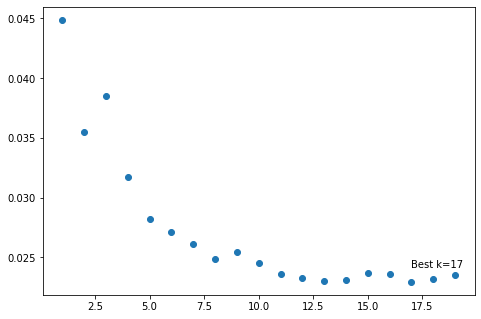

In [23]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(k_list,error)
ax.annotate("Best k=%s"%str(best_k),xy=(best_k,error[best_k]+0.001))